In [1]:
import sys
sys.path.extend(['/home/zadiq/dev/salt', 
                 '/home/zadiq/dev/competitions/salt', 
                 '/home/zoguntim/dev/s9043nfqhq89gh423qhjbfu89b4tj1qbfug8943'])
from tgs.dataset import SaltDataset
from tgs.models import TrainConfig
%matplotlib inline

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.metrics import precision_score

In [3]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import  *
from skimage import data, io
from skimage.measure import label, regionprops
from skimage.filters import *
from skimage.util import img_as_ubyte
import cv2

In [4]:
def distance(com, mid_point):
    diff = np.array(mid_point) - np.array(com)
    distance = np.sqrt((diff ** 2).sum()).round()
    return distance
    

In [28]:
T = TrainConfig()
dataset = SaltDataset(**T.dataset_params)
ds_img = dataset.display_img
ds_batch = dataset.display_batch

Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


In [146]:
img = io.imread('/media/zoguntim/ZHD/datasets/salt/train/images/images/003c477d7c.png', as_gray=True)
mask = io.imread('/media/zoguntim/ZHD/datasets/salt/train/masks/masks/003c477d7c.png', as_gray=True)

In [38]:
dataset.train_rle_df.apply(lambda x: (1, 3), axis=1)

id
575d24d81d    (1, 3)
a266a2a9df    (1, 3)
75efad62c1    (1, 3)
34e51dba6a    (1, 3)
4875705fb0    (1, 3)
782ae9b7e7    (1, 3)
9842f69f8d    (1, 3)
aa94cfb806    (1, 3)
50d3073821    (1, 3)
28f865caaa    (1, 3)
b5e1371b3b    (1, 3)
57e394bc67    (1, 3)
b45ad3932e    (1, 3)
ef51bbcde7    (1, 3)
d4d34af4f7    (1, 3)
302ea1ac81    (1, 3)
40dcff68b3    (1, 3)
7845115d01    (1, 3)
3da729cae9    (1, 3)
d67e3a11d8    (1, 3)
b3396387a6    (1, 3)
a5471f53d8    (1, 3)
d27831fef2    (1, 3)
7faea04242    (1, 3)
9747413253    (1, 3)
b9614348f4    (1, 3)
4696bb53e6    (1, 3)
fc250f574c    (1, 3)
005b452274    (1, 3)
02117a400e    (1, 3)
               ...  
16207869ba    (1, 3)
44d745a704    (1, 3)
711c478c93    (1, 3)
84e23dba29    (1, 3)
e73532b450    (1, 3)
8329ec9395    (1, 3)
7e7276d088    (1, 3)
0e63d9a8b4    (1, 3)
1d80de2ec9    (1, 3)
919bc0e2ba    (1, 3)
5cada3d3f1    (1, 3)
0530b67189    (1, 3)
fb44090bc7    (1, 3)
3c1ed5cc1f    (1, 3)
c7f54785b8    (1, 3)
158765ed16    (1, 3)
3ff3881428

In [29]:
for i, v in enumerate(dataset.raw_gen):
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [6]:
samples = next(dataset.raw_gen)

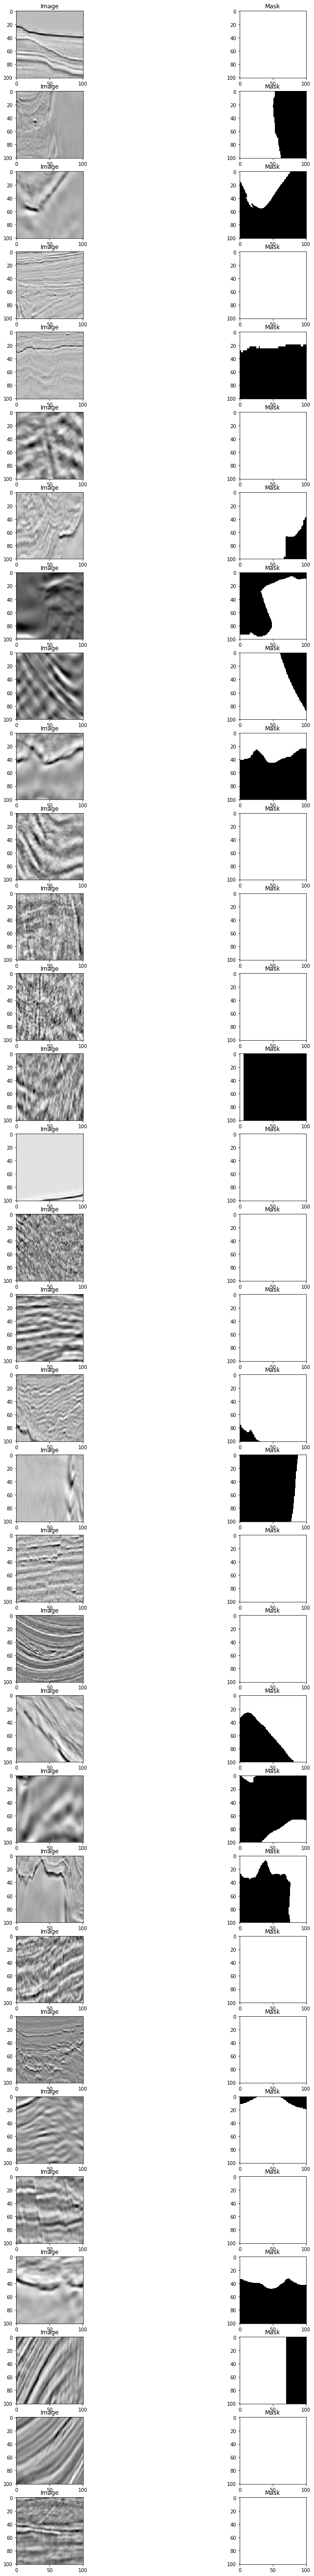

In [7]:
dataset.display_batch(samples, n=32)

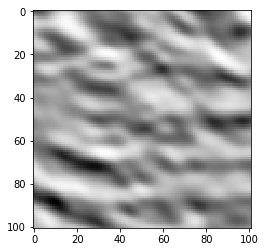

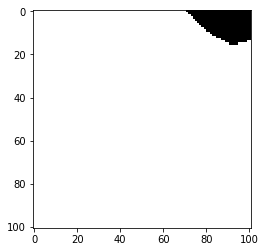

In [147]:
# 1, 18, 9, 17, 4, 7f, 22dk, 24b
# n = 28
# img, mask = samples[0][n], samples[1][n]

ds_img(img)
ds_img(mask)



/home/zoguntim/dev/dl-venv/lib/python3.5/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


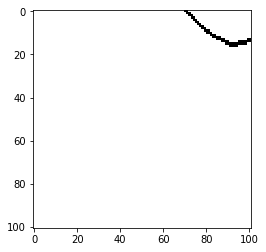

In [148]:
mask_edge_1 = rank.entropy(mask.squeeze(), disk(1)).round()
ds_img(mask_edge_1)

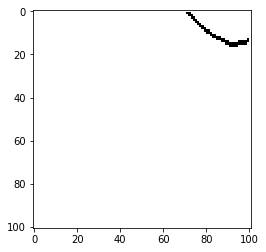

In [149]:
mask_edge = sobel(mask.squeeze()).round()
ds_img(mask_edge)

In [141]:

def get_edge_count(edge):
    labels, counts = label(mask_edge,return_num=True)
    if counts <= 1:
        return False, None
    
    centroids = []
    for r in regionprops(labels):
        centroids.append(r.centroid)
    
    print(centroids)
    point_1 = np.array(centroids[0])
    point_2 = np.array(centroids[1])
    
    diff = point_2 - point_1
    dis = distance(point_1, point_2)
    print(dis)
    mid_point = point_1 + (.5 * diff)
    print(mid_point)
    
    return True, tuple(mid_point.astype('int8'))
    

get_edge_count(mask_edge)

(False, None)

In [142]:
def get_mid_point(mask):
    x, y = np.where(mask == 1)
    return  x[x.shape[0]//2], y[y.shape[0]//2]

def close_off_line(edge):
    x, y = np.where(mask == 1)
    

In [150]:
img.shape

(101, 101)

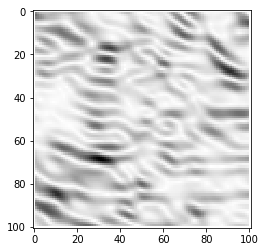

In [151]:
edges = sobel(img.squeeze(),)
ds_img(edges)

In [103]:
final_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True, False]])

In [81]:
edges

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02630668, 0.02079726, ..., 0.0127451 , 0.00657667,
        0.        ],
       [0.        , 0.02084342, 0.01278275, ..., 0.01470588, 0.01622838,
        0.        ],
       ...,
       [0.        , 0.0215909 , 0.0215909 , ..., 0.01643437, 0.01333478,
        0.        ],
       [0.        , 0.02352941, 0.02061156, ..., 0.01413942, 0.01060457,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

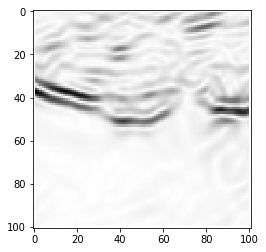

In [88]:
ds_img(io.imread('io.png'))

In [83]:
io.imsave(arr=edges, fname='io.png', )

/home/zoguntim/dev/dl-venv/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


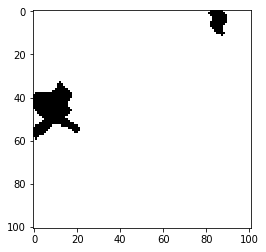

In [152]:
edges_mask = edges < .05
er = erosion(edges_mask, disk(2))
# ds_img(er)
# ds_img(ndi.binary_opening(er))
# ds_img(ndi.binary_erosion(edges_mask))
final_mask = remove_small_objects(ndi.binary_opening(er))
ds_img(final_mask)

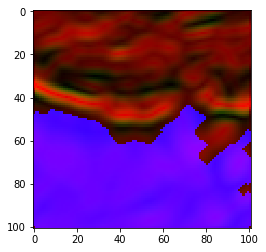

In [111]:
combined = np.dstack((
    img,
    edges,
    final_mask
))
ds_img(combined)

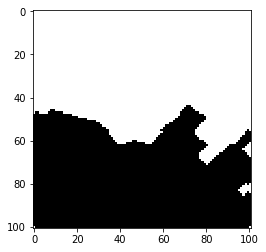

In [126]:
ds_img(io.imread('io.png'))

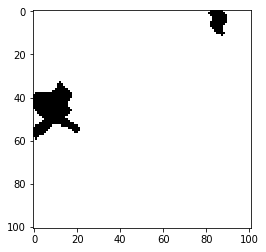

In [153]:
ds_img(final_mask.astype('int8'))

In [155]:
io.imsave('io.png', final_mask.astype('int8'))

/home/zoguntim/dev/dl-venv/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: io.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [15]:
squeezed_mask = final_mask.squeeze()
labels, num_of_labels = label(squeezed_mask, return_num=True)

In [17]:
def get_centroid(labels, mask, edge):
    has_centroid, edge_centroid = get_edge_count(edge)
    areas = []
    centroids = []
    label_classes = []
    for r in regionprops(labels):
        areas.append(r.area)
        centroids.append(r.centroid)
        label_classes.append(r.label)
        print("centroid: ", r.centroid)
        print("area: ", r.area)
        print("label: ", r.label)
        print("local centroid: ", r.local_centroid)
        print("---------------------------\n")
    biggest_blob = np.zeros_like(mask.squeeze())
    centroid = (50, 50)
    if areas:
        areas = np.array(areas)
        which = areas.argmax()
        biggest_blob[labels == label_classes[which]] = 1
        centroid = np.array(centroids[which]).astype('int8')
    if has_centroid:
        centroid = edge_centroid
        
    return biggest_blob, tuple(centroid)

centroid:  (13.543580470162748, 53.85352622061483)
area:  2765
label:  1
local centroid:  (13.543580470162748, 53.85352622061483)
---------------------------

centroid:  (51.148148148148145, 5.222222222222222)
area:  81
label:  2
local centroid:  (3.1481481481481484, 5.222222222222222)
---------------------------

centroid:  (56.68840579710145, 80.6231884057971)
area:  138
label:  3
local centroid:  (7.688405797101449, 6.6231884057971016)
---------------------------

centroid:  (92.87002652519894, 38.10079575596817)
area:  377
label:  4
local centroid:  (9.87002652519894, 16.10079575596817)
---------------------------

(13, 53)


/home/zoguntim/dev/dl-venv/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


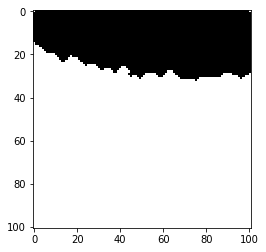

In [18]:
extracted_mask, com = get_centroid(labels, final_mask, mask_edge_1)
print(com)
ds_img(extracted_mask)

for r in regionprops(labels):
    print("centroid: ", r.centroid)
    print("area: ", r.area)
    print("label: ", r.label)
    print("local centroid: ", r.local_centroid)
    print("---------------------------\n")

extracted_mask = np.zeros_like(squeezed_mask)
extracted_mask[labels == 2] = 1
ds_img(extracted_mask)
# com = (50, 36)
com = (49, 61)

com = np.zeros(2)
s = np.zeros(2)
for x in range(0, 101):
    for y in range(0, 101):
        com += final_mask[x][y] * np.array([x,y])
        s += final_mask[x][y]
com /= s
com = tuple(com.astype('int8'))
rotated = rotate_around_midpoint(com, mid_point)
comby = np.logical_or(mask_edge_1.copy(), remove_small_objects(ndi.binary_opening(er)))
ds_img(comby)
rotated, com

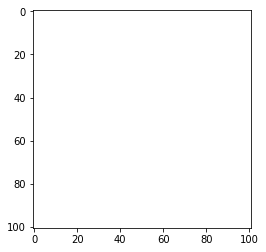

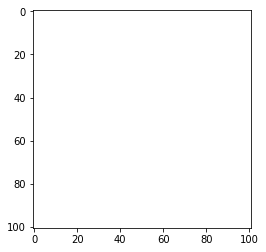

In [19]:
new_image = final_mask.copy().reshape(101, 101, 1).astype('float32')
# new_comby = comby.copy().reshape(101, 101, 1).astype('float32')
mask_edge_copy = mask_edge_1.copy().reshape(101, 101, 1).astype('float32')

# filled_black = cv2.floodFill(new_comby.copy(), None, com, 1, )
filled_white = cv2.floodFill(mask_edge_copy.copy(), None, com, 1, )

# ds_img(filled_black[1])
ds_img(filled_white[1])
supposed_filled = np.logical_not(filled_white[1].copy())
ds_img(supposed_filled)

There are two ways to combine filled_edge and predicted mask:
    - use one of the filled_edges based on  precision
    - merged filled_edges and predicted_mask based on precision
    - use protocol one but use protocol two when unsure

In [20]:
matrix_1 = (extracted_mask.squeeze() == filled_white[1].squeeze()).ravel()
matrix_2 = (extracted_mask.squeeze() == supposed_filled.squeeze()).ravel()

In [21]:
matrix_1

array([False,  True,  True, ..., False, False, False])

In [22]:
precision_score(extracted_mask.ravel(), matrix_1)

1.0

In [23]:
precision_score(extracted_mask.ravel(), matrix_2)

0.0

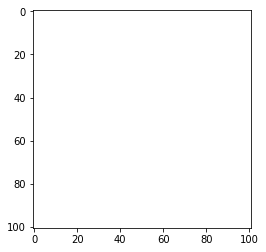

In [24]:
ds_img(np.logical_or(extracted_mask.squeeze(), filled_white[1].squeeze()))

In [938]:
def flip_point(com, mid_point):
    x_com, y_com = com
    x_mid, y_mid = mid_point
    x_diff = x_mid - x_com 
    y_diff = y_mid - y_com 
    
    prot = "x" if abs(x_diff) > abs(y_diff) else "y"
    
    if prot == "x":
        print("protocol x")
    else: # protocol y
        print("protocol y")
        y_flip = y_mid + y_diff
        x_flip = x_com
    return x_flip, y_flip

def distance(com, mid_point):
    diff = np.array(mid_point) - np.array(com)
    distance = np.sqrt((diff ** 2).sum()).round()
    return distance
    
def rotate_via_numpy(xy, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])

    return float(m.T[0]), float(m.T[1])

def min_max(size):
    eps = 2
    return max(min(round(size), 101 - eps), eps)

def rotate_around_midpoint(com, midpoint):
    radius = np.pi
    x, y = com
    mid_x, mid_y = midpoint
    diff_x = (x - mid_x)
    diff_y = (y - mid_y)
    cos_rad = math.cos(radius)
    sin_rad = math.sin(radius)
    rotated_x = min_max(mid_x + (cos_rad * diff_x) + (sin_rad * diff_y))
    rotated_y = min_max(mid_y + (-sin_rad * diff_y) + (cos_rad * diff_y))
    return int(rotated_x), int(rotated_y)
    

In [624]:
com

array([49.85017375, 36.85244587])

/home/zadiq/dev/venv/dl_35/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


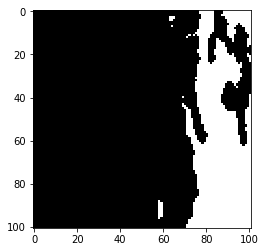

In [607]:
markers = rank.gradient(erosion(img).squeeze(), disk(1)) < 9
dd = dilation(remove_small_objects(markers))
ds_img(dd)

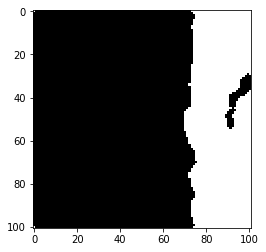

In [608]:
from skimage.segmentation import slic, join_segmentations
ds_img(join_segmentations(mask_edge, remove_small_objects(ndi.binary_opening(er))))

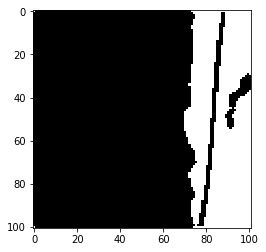

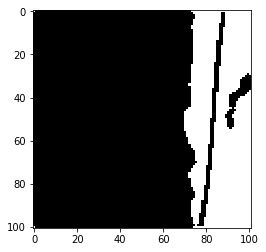

In [609]:
comby = np.logical_or(sobel(mask.squeeze()), remove_small_objects(ndi.binary_opening(er)))
ds_img(comby)
ds_img((comby))

In [610]:
from skimage import data

coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

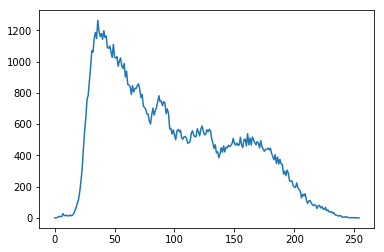

In [338]:
plt.plot(hist[1][:-1], hist[0])

In [526]:
import cv2
def img_fill(im_in, n):  # n = binary image threshold
    th, im_th = cv2.threshold(im_in, n, 255, cv2.THRESH_BINARY);

    # Copy the thresholded image.
    im_floodfill = im_th.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0, 0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    fill_image = np.bitwise_or(im_th, im_floodfill_inv)

    return fill_image 

In [567]:
ds_img(img_fill(combii, 0))

TypeError: ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [613]:
combii = mask_edge.copy()
combii = combii.astype('float32').reshape(101, 101, 1)
combii 

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [614]:
img

array([[[0.38823533],
        [0.38823533],
        [0.3803922 ],
        ...,
        [0.4431373 ],
        [0.34117648],
        [0.37254903]],

       [[0.3921569 ],
        [0.3921569 ],
        [0.38823533],
        ...,
        [0.45882356],
        [0.35686275],
        [0.35686275]],

       [[0.38823533],
        [0.38823533],
        [0.38823533],
        ...,
        [0.454902  ],
        [0.36862746],
        [0.34509805]],

       ...,

       [[0.34901962],
        [0.34901962],
        [0.34901962],
        ...,
        [0.37647063],
        [0.3803922 ],
        [0.40000004]],

       [[0.34901962],
        [0.34901962],
        [0.34901962],
        ...,
        [0.32941177],
        [0.35686275],
        [0.37647063]],

       [[0.34901962],
        [0.34509805],
        [0.34901962],
        ...,
        [0.2627451 ],
        [0.30980393],
        [0.34901962]]], dtype=float32)

In [615]:
_, uu, __, ___ = cv2.floodFill(combii.copy(), None, (90, 5), 1)

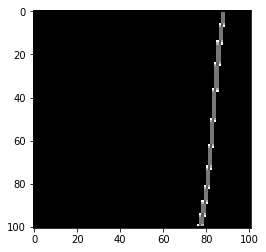

In [616]:
ds_img(uu)

In [572]:
uu = uu.squeeze().astype('int8')

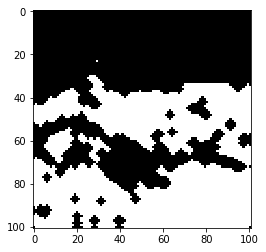

In [573]:
ds_img(np.bitwise_xor(uu.copy(), comby.copy()))

In [457]:
comby.astype('int8').reshape(101, 101, 1).shape

(101, 101, 1)

In [452]:
comby.astype('int8').shape

(101, 101)